# Introduction:
The purpose of this notebook is to investigate the customer behavior and run model to get the exact customer insight to promote and run appropriate marketing strategy  
The Excel file is attach on
The data source is from KPMG AU data Analytics virtual internship__https://www.theforage.com/virtual-internships/theme/m7W4GMqeT3bh9Nb2c/KPMG-Data-Analytics-Virtual-Internship?ref=F3nuznoTtYuAQGhWd__

## Import library and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows',50)

In [3]:
pd.set_option('display.max_columns', 30)

In [4]:
data = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')

## Import first dataset: "Transaction" and cleanning

In [5]:
transaction = pd.read_excel(data, 'Transactions', skiprows=1)
transaction.head(10)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
5,6,25,2339,2017-03-08,1.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,39031.0
6,7,22,1542,2017-04-21,1.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0
7,8,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,1292.84,13.44,39915.0
8,9,67,1305,2017-08-10,0.0,Approved,Solex,Standard,medium,large,1071.23,380.74,33455.0
9,10,12,3262,2017-08-30,1.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,38216.0


1. **drop unnesscessary columns**  
Product_first_sold_date and transaction_date seem not to be usefull to predict the product_line for customer segmentation

In [6]:
columns_drop = ["transaction_date", "product_first_sold_date"]
transaction.drop(columns_drop, axis = 1, inplace=True)
transaction

,transaction_id,product_id,customer_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
0,1,2,2950,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62
1,2,3,3120,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92
2,3,37,402,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82
3,4,88,3135,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10
4,5,78,787,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48
...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40
19996,19997,41,127,1.0,Approved,Solex,Road,medium,medium,416.98,312.74
19997,19998,87,2284,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71
19998,19999,6,2764,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73


## Import the second dataset: Customer Demographic and cleanning

In [7]:
customerdemographic = pd.read_excel(data, "CustomerDemographic", skiprows=1)
customerdemographic.head(10)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,â°â´âµâââ,Yes,11.0
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»),No,7.0
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20.0


> The second dataset - Customer Demographic: The data content current customer information


### Check values and remove false data cells

Generate customer age from their DOB( date of birth) to have a better view at their demographic

In [8]:
len(customerdemographic['DOB'].unique())

3449

In [9]:
customerdemographic['DOB_Clean']= pd.to_datetime(customerdemographic['DOB'])

In [10]:
customerdemographic['age']= datetime.datetime.now().year-pd.DatetimeIndex(customerdemographic['DOB_Clean']).year

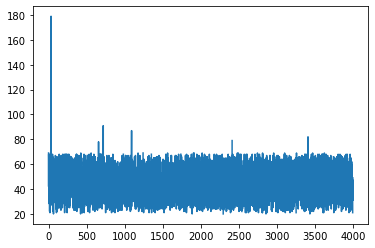

In [11]:
plt.plot(customerdemographic['age'])
plt.show()

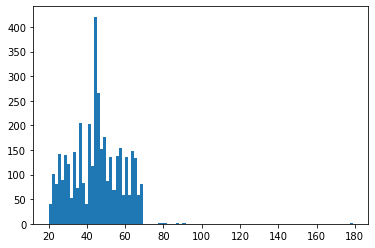

In [12]:
plt.hist(customerdemographic['age'], bins=100)
plt.show()

In [13]:
customerdemographic = customerdemographic[customerdemographic['age']<100]

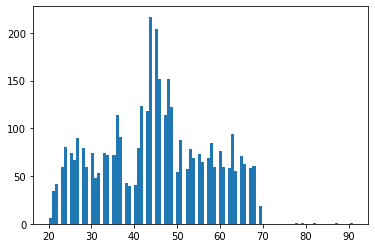

In [14]:
plt.hist(customerdemographic['age'], bins=100)
plt.show()

In [15]:
customerdemographic.columns


Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure', 'DOB_Clean', 'age'],
      dtype='object')

In [16]:
customerdemographic= customerdemographic[['customer_id', 'gender', 'past_3_years_bike_related_purchases', 
                                           'job_title', 'job_industry_category', 'wealth_segment',
                                           'owns_car', 'tenure', 'age']]

### Replace inconsistent values for the same attribute

In [17]:
print(customerdemographic['gender'].unique())
#customerdemographic.loc[4].at['gender']


['F' 'Male' 'Female' 'Femal' 'M']


In [18]:
customerdemographic.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3989, 3990, 3991, 3992, 3993, 3994, 3995, 3996, 3998, 3999],
           dtype='int64', length=3912)

In [19]:
for i in customerdemographic.index:
    if customerdemographic.at[i,'gender'] == 'F' or customerdemographic.at[i,'gender']=='Femal':
        customerdemographic.at[i,'gender'] = 'Female'
    if customerdemographic.at[i,'gender'] == 'M':
        customerdemographic.at[i,'gender'] = 'Male'
    

In [20]:
customerdemographic['gender'].unique()

array(['Female', 'Male'], dtype=object)

## Join the customer demographic with the transaction data to preprare for the model

In [21]:
merge = transaction.join(customerdemographic.set_index('customer_id'), on='customer_id')

In [22]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       20000 non-null  int64  
 1   product_id                           20000 non-null  int64  
 2   customer_id                          20000 non-null  int64  
 3   online_order                         19640 non-null  float64
 4   order_status                         20000 non-null  object 
 5   brand                                19803 non-null  object 
 6   product_line                         19803 non-null  object 
 7   product_class                        19803 non-null  object 
 8   product_size                         19803 non-null  object 
 9   list_price                           20000 non-null  float64
 10  standard_cost                        19803 non-null  float64
 11  gender                      

# Import third dataset: Customer address

In [23]:
address = pd.read_excel(data, 'CustomerAddress', skiprows=1, )
address.head(10)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
5,7,4 Delaware Trail,2210,New South Wales,Australia,9
6,8,49 Londonderry Lane,2650,New South Wales,Australia,4
7,9,97736 7th Trail,2023,New South Wales,Australia,12
8,11,93405 Ludington Park,3044,VIC,Australia,8
9,12,44339 Golden Leaf Alley,4557,QLD,Australia,4


In [24]:
address= address[['customer_id', 'state', 'property_valuation']]

In [25]:
merge = merge.join(address.set_index('customer_id'), on='customer_id')

In [26]:
merge.dropna(axis=0, how = 'any', inplace=True)

In [27]:
merge.isna().sum()

transaction_id                         0
product_id                             0
customer_id                            0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
owns_car                               0
tenure                                 0
age                                    0
state                                  0
property_valuation                     0
dtype: int64

In [28]:
merge

,transaction_id,product_id,customer_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,state,property_valuation
0,1,2,2950,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,Male,19.0,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,67.0,VIC,6.0
1,2,3,3120,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,Female,89.0,Clinical Specialist,Health,Mass Customer,Yes,10.0,43.0,NSW,5.0
2,3,37,402,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,Male,9.0,Desktop Support Technician,Retail,Affluent Customer,No,22.0,45.0,NSW,1.0
3,4,88,3135,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,Male,83.0,Staff Scientist,Financial Services,Mass Customer,No,16.0,60.0,NSW,10.0
5,6,25,2339,1.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,Male,3.0,Web Designer II,Property,Affluent Customer,Yes,16.0,64.0,NSW,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,19995,9,718,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,Female,38.0,Engineer I,Manufacturing,Mass Customer,Yes,7.0,44.0,QLD,11.0
19995,19996,51,1018,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,Male,1.0,Help Desk Operator,Manufacturing,Mass Customer,Yes,7.0,28.0,VIC,10.0
19996,19997,41,127,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,Female,81.0,Compensation Analyst,Financial Services,Mass Customer,No,19.0,48.0,QLD,1.0
19997,19998,87,2284,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,Female,83.0,Staff Accountant IV,Telecommunications,High Net Worth,No,14.0,48.0,VIC,1.0


In [29]:
merge.columns

Index(['transaction_id', 'product_id', 'customer_id', 'online_order',
       'order_status', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'age',
       'state', 'property_valuation'],
      dtype='object')

###### 

# Run multi models try to predict product_line for customer to provide appropriate marketing strategy

In [30]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(dtype=int)
merge[['order_status','brand','product_line', 'product_class', 'product_size',
       'gender', 'job_title', 'job_industry_category', 
       'wealth_segment', 'owns_car','state']] = ord_enc.fit_transform(merge[['order_status','brand','product_line', 
                                                                     'product_class', 'product_size',
       'gender', 'job_title', 'job_industry_category', 'wealth_segment', 'owns_car', 'state']])

In [31]:
merge

,transaction_id,product_id,customer_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,state,property_valuation
0,1,2,2950,0.0,0,3,2,2,1,71.49,53.62,1,19.0,155,2,2,1,10.0,67.0,3,6.0
1,2,3,3120,1.0,0,4,2,2,0,2091.47,388.92,0,89.0,42,3,2,1,10.0,43.0,0,5.0
2,3,37,402,0.0,0,2,2,1,1,1793.43,248.82,1,9.0,57,7,0,0,22.0,45.0,0,1.0
3,4,88,3135,0.0,0,1,2,2,1,1198.46,381.10,1,83.0,168,2,2,0,16.0,60.0,0,10.0
5,6,25,2339,1.0,0,0,1,2,1,1538.99,829.65,1,3.0,188,6,0,1,16.0,64.0,0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,19995,9,718,1.0,0,2,1,2,1,742.54,667.40,0,38.0,65,5,2,1,7.0,44.0,2,11.0
19995,19996,51,1018,1.0,0,2,2,0,1,2005.66,1203.40,1,1.0,87,5,2,1,7.0,28.0,3,10.0
19996,19997,41,127,1.0,0,3,1,2,1,416.98,312.74,0,81.0,44,2,2,0,19.0,48.0,2,1.0
19997,19998,87,2284,1.0,0,2,2,2,1,1636.90,44.71,0,83.0,167,8,1,0,14.0,48.0,3,1.0


In [32]:
corr_matrix = merge.corr()
corr_matrix

,transaction_id,product_id,customer_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,state,property_valuation
transaction_id,1.000000,-0.008239,-0.000785,0.005109,-0.006794,0.011923,0.000357,-0.006915,-0.010731,-0.002471,-0.003306,0.003521,-0.001999,-0.000334,0.008007,-0.004075,-0.005401,0.000633,-0.002506,0.000793,-0.006331
product_id,-0.008239,1.000000,0.005301,-0.000556,0.013817,0.003084,0.130180,0.064576,-0.088476,0.085029,0.029838,0.006088,-0.004882,0.009969,0.001944,0.012575,-0.043714,-0.016159,-0.011418,0.013486,-0.002587
customer_id,-0.000785,0.005301,1.000000,0.001381,-0.005812,-0.003522,-0.010308,0.002650,-0.010848,0.022661,0.012619,-0.026424,0.012938,0.001292,0.011982,-0.010066,0.040552,-0.022371,-0.023474,-0.000624,0.001587
online_order,0.005109,-0.000556,0.001381,1.000000,0.020281,-0.014822,-0.005500,-0.021552,0.009073,-0.003513,0.008578,0.010828,0.002157,-0.014328,-0.002861,-0.005815,0.003976,0.011967,-0.005785,-0.000288,0.000358
order_status,-0.006794,0.013817,-0.005812,0.020281,1.000000,0.004370,-0.001157,-0.000520,-0.005631,0.006894,0.005765,0.000066,-0.015263,-0.003646,-0.000551,-0.008780,-0.012812,0.018341,0.007109,-0.006932,0.012816
brand,0.011923,0.003084,-0.003522,-0.014822,0.004370,1.000000,0.115498,0.187560,-0.017727,0.076322,-0.225480,-0.012477,-0.002660,-0.013456,-0.001815,0.005588,0.000516,0.007685,-0.000883,0.000182,0.004415
product_line,0.000357,0.130180,-0.010308,-0.005500,-0.001157,0.115498,1.000000,0.051005,-0.198295,0.203051,-0.106945,0.001417,0.014142,0.004576,-0.011597,-0.016006,0.017083,0.016904,0.012689,-0.008431,-0.004371
product_class,-0.006915,0.064576,0.002650,-0.021552,-0.000520,0.187560,0.051005,1.000000,-0.099255,0.073297,-0.151671,-0.002876,0.010081,-0.010525,0.012579,0.003297,0.011439,-0.003335,-0.001987,0.016807,-0.010045
product_size,-0.010731,-0.088476,-0.010848,0.009073,-0.005631,-0.017727,-0.198295,-0.099255,1.000000,-0.140929,0.355708,-0.008504,0.003408,-0.005666,-0.010805,0.000864,0.009643,-0.004738,-0.004171,0.001443,0.009265
list_price,-0.002471,0.085029,0.022661,-0.003513,0.006894,0.076322,0.203051,0.073297,-0.140929,1.000000,0.554631,0.014558,0.007822,-0.006429,-0.000492,-0.001712,0.023339,0.001272,-0.000493,0.004824,-0.011303


In [33]:
corr_matrix['product_line']

transaction_id                         0.000357
product_id                             0.130180
customer_id                           -0.010308
online_order                          -0.005500
order_status                          -0.001157
brand                                  0.115498
product_line                           1.000000
product_class                          0.051005
product_size                          -0.198295
list_price                             0.203051
standard_cost                         -0.106945
gender                                 0.001417
past_3_years_bike_related_purchases    0.014142
job_title                              0.004576
job_industry_category                 -0.011597
wealth_segment                        -0.016006
owns_car                               0.017083
tenure                                 0.016904
age                                    0.012689
state                                 -0.008431
property_valuation                    -0

#### Pick the most correlate to product_line to run model, except any type of id
chosen: past 3 years bike related purchases, job industry category wealth segment, owns car, tenure, age

In [34]:
merge.columns

Index(['transaction_id', 'product_id', 'customer_id', 'online_order',
       'order_status', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'age',
       'state', 'property_valuation'],
      dtype='object')

In [35]:
merge = merge[['past_3_years_bike_related_purchases', 'job_industry_category', 
               'wealth_segment','owns_car','tenure','age', 'product_line']]

In [36]:
merge.head(10)

,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,age,product_line
0,19.0,2,2,1,10.0,67.0,2
1,89.0,3,2,1,10.0,43.0,2
2,9.0,7,0,0,22.0,45.0,2
3,83.0,2,2,0,16.0,60.0,2
5,3.0,6,0,1,16.0,64.0,1
6,56.0,3,2,1,12.0,44.0,2
7,67.0,5,1,0,18.0,36.0,2
8,97.0,2,1,1,6.0,52.0,2
9,65.0,1,2,0,12.0,63.0,2
11,14.0,7,0,1,7.0,44.0,2


In [37]:
merge.product_line.unique()

array([2, 1, 0, 3])

In [38]:
import seaborn as sns


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error

import seaborn as sns

In [52]:
x_train, x_test, y_train, y_test =  train_test_split(merge.drop('product_line', axis = 1), 
                                                     merge['product_line'],
                                                     test_size=0.2,
                                                     random_state=142,
                                                     stratify=merge['product_line'] )

# Logistic Regression

In [53]:
LR = LogisticRegression().fit(x_train,y_train)

Evaluate the model

In [59]:
print(accuracy_score( y_train, LR.predict(x_train),), r2_score(y_train, LR.predict(x_train)))

0.7174241750422485 -0.10937682727166398


run to test of **Test data**

In [60]:
accuracy_score(y_test, LR.predict(x_test))

0.7175382426182854

# KNN model

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
CLF = KNeighborsClassifier(n_neighbors=8)
CLF.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [65]:
accuracy_score(y_train, CLF.predict(x_train))

0.723561327047941

The Accuracy_score seem to higher than Logistic Regression model

## What if another feature also meanful for the model?

In [61]:
LR.coef_

array([[-0.00554775, -0.07047866, -0.02799313, -0.04888886, -0.01211002,
        -0.01812018],
       [ 0.00163373,  0.0549242 ,  0.19916725, -0.109323  ,  0.00448286,
         0.00682231],
       [ 0.00267832,  0.04052487,  0.02788219,  0.20829088,  0.00033445,
         0.01285993],
       [ 0.00123569, -0.02497041, -0.19905631, -0.05007903,  0.00729272,
        -0.00156205]])

In [62]:
x_train.columns

Index(['past_3_years_bike_related_purchases', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'age'],
      dtype='object')